# SOLUTIONS: Determining the Hubble Constant

The Hubble constant can be calculated via the following formula:

$H_{0} = \frac{z c}{d}$

where z = redshift, c = speed of light ($3\times10^5$ kms$^{-1}$) and d = distance (Mpc). Remember $H_{0}$ typically has units of kms$^{-1}$Mpc$^{-1}$.

Below you have been given data from an astronomical survey which has found the luminosity distance and redshift to 16 galaxies. It is now our job to determine the Hubble Constant and understand the confidence we have in our results.

In [3]:
# Packages to import
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [18]:
# Distance and Redshift to 16 galaxies
distance = np.array([77, 4, 10, 21, 45, 15, 17, 22, 70, 57, 62, 12, 6, 33, 29, 2], dtype = 'float') # in Mpc
z = np.array([174.53, 9.07, 22.67, 47.60, 102.00, 34.00, 38.53, 49.87, 158.67, 129.20, 140.53, 27.20, 13.60, 74.80, 65.73, 4.53], dtype = 'float')*10**-4

**Exercise:** Let's add some noise to each dataset. Create one normal distribution with a mean of zero and standard deviation of 3. Then add this noise to the distance dataset. Then create one more normal distribution with a mean of zero and standard deviation of $3\times10^{-4}$. Then add this noise to the redshift dataset.

In [36]:
# Answer here
import numpy.random as rnd
noise1 = rnd.normal(0., 3., size=len(distance))
noise2 = rnd.normal(0., 3.E-4, size=len(distance))


In [37]:
distance_n = distance + noise1
z_n = z + noise2

## Look at the data to guess the model

**Exercise**: Plot the luminosity distance versus the redshift data for all of the 16 galaxies to get an idea of what the data look like. Can you think of a model that should fit this data?

Text(0, 0.5, 'redshift')

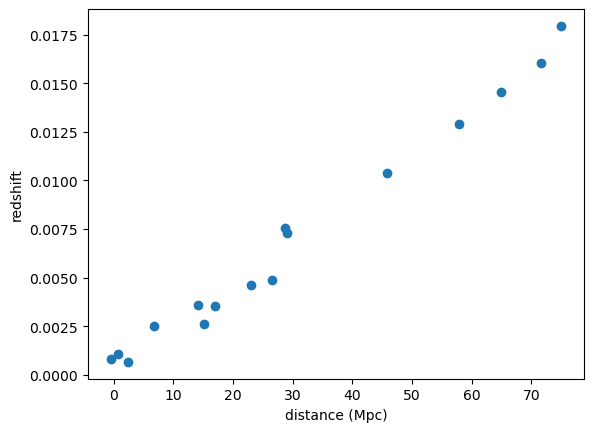

In [41]:
# Answer here
plt.scatter(distance_n, z_n)
plt.xlabel('distance (Mpc)')
plt.ylabel('redshift')

## Least squares regression

Rather than drawing a best fit curve by eye we can use least squares regression to find a model which best describes the data by minimising the sum of the squares of the residuals on the curve. The residual refers to the difference between the observed value and the model value.

### Linear Fit
Given the problem above we can guess that a simple linear curve of the form $y = mx + c$ (where $m$ = gradient and $c$ = intercept) should describe this data well.

See the introductory slides for a discussion of this, but the relevant equations you need are:

$m = \frac{N \sum_i(x_i y_i) - \sum_i (x_i) \sum_i (y_i)}{N \sum_i (x_i^2) - \left(\sum_i (x_i)\right)^2}$

$c = \frac{\sum_i(y) - m \sum_i(x)}{N}$


**Exercise**: Determine the gradient

In [51]:
# Answer here
N = len(distance_n)

m = (
    (N * (distance_n * z_n).sum() - distance_n.sum() * z_n.sum() ) /
    (N * (distance_n*distance_n).sum()  - (distance_n.sum())**2 )
)

**Exercise**: Determine the intercept

In [52]:
# Answer here
c = (z_n.sum() - m * distance_n.sum()) / N
c

0.0003020225971341545

**Exercise**: Make a plot showing both the data and the model. Confirm to yourself that the model fits the data well.

Text(0, 0.5, 'redshift')

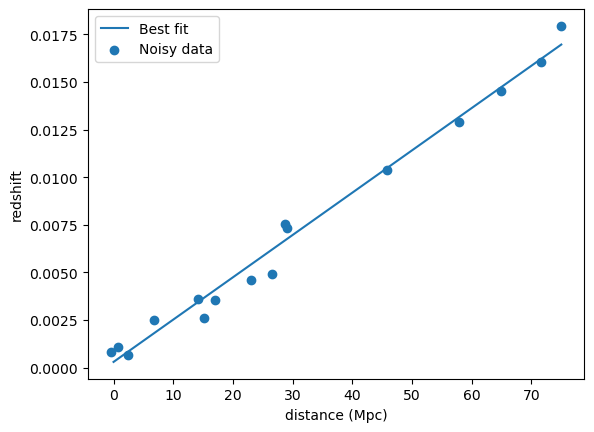

In [54]:
# Answer here
distance_m = np.linspace(0,75,1000)
z_m = distance_m * m + c

plt.plot(distance_m, z_m, label='Best fit')
plt.scatter(distance_n, z_n, label='Noisy data')
plt.xlabel('distance (Mpc)')
plt.legend()
plt.ylabel('redshift')

**Exercise**: Estimate the Hubble Constant (with units of kms$^{-1}$Mpc$^{-1}$) using your model.

In [56]:
# Answer here
H0 = 3E5 * m
H0

66.66485373931289

## Residuals and Coefficient of Determination

We have already met the residual when determining the model via least squares regression. But now we want to understand how well our model fits the data. This is where we turn to the coefficient of determination, also known as R$^2$. It provides a measure of how well a model produces the observed outcomes. A value of R$^2$=1 means that the model represents the data perfectly, whereas a value of R$^2$=0 does not model the data at all. Typically if a model has an R$^2>$0.7  is considered a good fit to the data.

R$^2$ is defined as:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$,

where $SS_{res} = \sum(y_i-f_i)^2$ and $SS_{tot} = \sum(y - \bar{y})^2$ for a data set y and model f.

NOTE: $f_i$ can be obtained by taking the $x_i$ values and finding what $y$ values the model predicts at those values of $x$. (So just do y = m * x + c in this case using the m and x you obtained). $\bar{y}$ is the mean value of $y$ over the full dataset.


**Exercise:** Calculate the R$^2$ value for your model. Do you think the model fits the data well?

In [94]:
# Answer here
z_fitted = distance_n * m + c

SSres = ((z - z_fitted)**2).sum()
ybar = z.sum() / N
SStot = ((z - ybar)**2).sum()
R2 = 1 - SSres / SStot
R2

0.9888392726716895


## Scipy Optimize

In the previous section we used least squares regression to determine the model which best represents the Hubble data. Now let's use the ```scipy_optimize``` package to do the same.

We still need to have an idea of the model we want to fit to the data. But the package ```curve_fit``` finds the optimal parameters, in our case the gradient and intercept, for us.

The syntax for curve_fit is typically:

```params, covariance = curve_fit(model, x, y)```

*  params are the optimal values for the parameters so that the sum of the squared residuals of model(x, *params) - y is minimized.
* covariance is the estimated approximate covariance of params.

**Exercise:** Write a function to determine a linear model. **NOTE** the function should take 3 arguments, x, m and c, and return y. x and y should be expected to be numpy arrays, m and c are scalars

In [95]:
# Answer here
def lin_model(x, m, c):
    return m*x + c

**Exercise:** Use the ```curve_fit``` package to determine the gradient and intercept of the data. **NOTE** You can ignore the `covariance` returned. `params` will be a tuple containing (`m`,`c`).

In [96]:
# Answer here

params, _ = curve_fit(lin_model, distance_n, z_n)

**Exercise:** Plot your `curve_fit` model with the data

(0.00022221617913104294, 0.0003020225971341545) [0.00022222 0.00030202]


Text(0, 0.5, 'redshift')

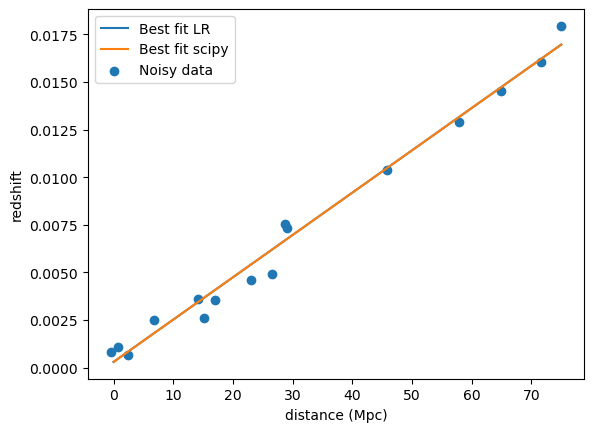

In [99]:
# Answer here
distance_m = np.linspace(0,75,1000)
z_m = distance_m * m + c
z_m2 = distance_m * params[0] + params[1]

print((m,c), params)

plt.plot(distance_m, z_m, label='Best fit LR')
plt.plot(distance_m, z_m2, label='Best fit scipy')
plt.scatter(distance_n, z_n, label='Noisy data')
plt.xlabel('distance (Mpc)')
plt.legend()
plt.ylabel('redshift')

**Exercise:** Does this model fit your data better or worse than the model you determined from least squares regression?




In [100]:
# Answer here
z_fitted = distance_n * params[0] + params[1]

SSres = ((z - z_fitted)**2).sum()
ybar = z.sum() / N
SStot = ((z - ybar)**2).sum()
R2 = 1 - SSres / SStot
R2

0.9888392726667178

**Exercise:** Now try fitting a second order polynomial curve (i.e. ax + bx$^2$ + c ) to the data. Does this fit the data better or worse than the linear model you previously used? **NOTE** You will need to write a new function taking `x, a, b, c` as inputs. Now after calling `curve_fit` the return `params` will contain `(a,b,c)`

(0.00022221617913104294, 0.0003020225971341545) [5.72338797e-07 1.79950003e-04 7.03231651e-04]


Text(0, 0.5, 'redshift')

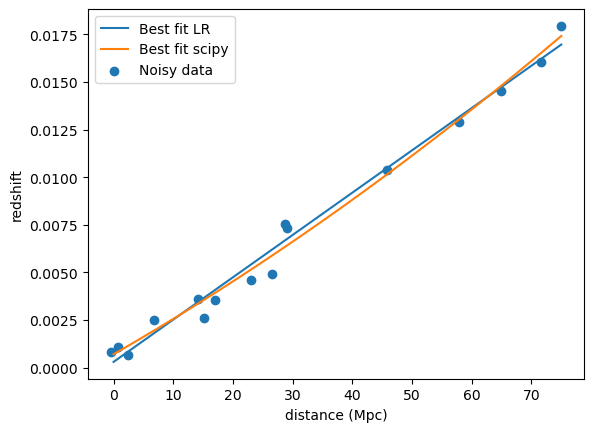

In [103]:
# Answer here
def poly_model(x, a, b, c):
    return a*x**2 + b*x + c

params, _ = curve_fit(poly_model, distance_n, z_n)

distance_m = np.linspace(0,75,1000)
z_m = distance_m * m + c
z_m2 = distance_m**2 * params[0] + distance_m * params[1] + params[2]

print((m,c), params)

plt.plot(distance_m, z_m, label='Best fit LR')
plt.plot(distance_m, z_m2, label='Best fit scipy')
plt.scatter(distance_n, z_n, label='Noisy data')
plt.xlabel('distance (Mpc)')
plt.legend()
plt.ylabel('redshift')

In [105]:
z_fitted = distance_n**2 * params[0] + distance_n * params[1] + params[2]

SSres = ((z - z_fitted)**2).sum()
ybar = z.sum() / N
SStot = ((z - ybar)**2).sum()
R2 = 1 - SSres / SStot
R2

0.991066330019336


## Numpy Polyfit and Poly1d

So far we have fit a model that we knew or guessed to fit to the Hubble data. But what if you are not sure what type of model may fit the data? This is where the function ```polyfit``` in ```numpy``` comes in. This function is a least squares polynomial fit. So we can use this function to determine which polynomial degree best describes the data.

A polynomial of degree 1 is the linear curve we have been dealing with ($y=mx+c$), degree two is $y=ax^2 +mx +c$, degree three is $y=bx^3 + ax^2 +mx +c$ etc...

The syntax for this function is:

```pol = numpy.polyfit(x, y, degree)```

where pol is polynomial coefficients (highest power first). So for degree=1, `pol` will be a tuple `(m,c)`. For degree=2, `pol` will be a tuple `(a,m,c)` etc.

We can then use ```numpy.poly1d``` to create a function object that will take `x` values as input and return the `y` values. What this means in practice is we can do the following to work out the y axis values from the output of `polyfit`:
```
model = numpy.poly1d(pol)
y_value_model = model(x)
```







**Exercise**: Determine the gradient and intercept of a new degree=1 model using the `polyfit` function.

In [112]:
# Answer here
params = np.polyfit(distance_n, z_n, 1)

**Exercise:** Make a plot with your new model and the original data

(0.00022221617913104294, 0.0003020225971341545) [0.00022222 0.00030202]


Text(0, 0.5, 'redshift')

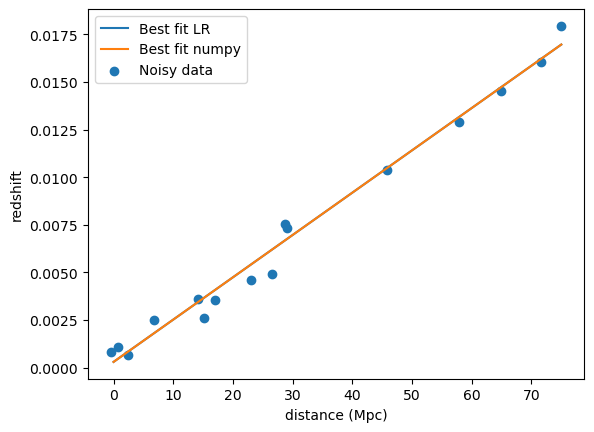

In [113]:
# Answer here
distance_m = np.linspace(0,75,1000)
z_m = distance_m * m + c
z_m2 = distance_m * params[0] + params[1]

print((m,c), params)

plt.plot(distance_m, z_m, label='Best fit LR')
plt.plot(distance_m, z_m2, label='Best fit numpy')
plt.scatter(distance_n, z_n, label='Noisy data')
plt.xlabel('distance (Mpc)')
plt.legend()
plt.ylabel('redshift')

**Exercise:** How does this model compare with the linear model you used from least squares regression and `curve_fit`?

In [15]:
# Answer here
# All the linear models are the same

**Exercise:** Does a second order polynomial fit better than a linear fit (according to `polyfit`)?



In [115]:
# Answer here
params = np.polyfit(distance_n, z_n, 2)

z_fitted = distance_n**2 * params[0] + distance_n * params[1] + params[2]

SSres = ((z - z_fitted)**2).sum()
ybar = z.sum() / N
SStot = ((z - ybar)**2).sum()
R2 = 1 - SSres / SStot
R2

0.9910663300448663

In [ ]:
# Second order polynomial has higher fit, but is likely overfitting.